# 例3.13 70次化學化應過程數據。

## data1.8.csv

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.tsa.api as smt
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test

## statsmodels自帶的畫ACF的函數

In [3]:
def drawts(y,pname):
    ##draw ax
    fig = plt.figure(figsize=(10,8))
    ts_ax=plt.subplot2grid((2,2),(0,0),colspan=2)
    acf_ax=plt.subplot2grid((2,2),(1,0))
    pacf_ax=plt.subplot2grid((2,2),(1,1))
    ##draw plot
    ts_ax.plot(y,'*-')
    ts_ax.set_title('Time Series Analysis Plots')
    smt.graphics.plot_acf(y,lags=None,ax=acf_ax,alpha=0.05) ##2sigma
    smt.graphics.plot_pacf(y,lags=None,ax=pacf_ax,alpha=0.05)  ##2sigma
    #plt.savefig('%s.jpg'%pname,dpi=256)
    plt.show()
    plt.close()

## statsmodels自帶的LB test

In [4]:
def purerandtest(y):
    a,b=lb_test(y,lags=None,boxpierce=False)
    LB_purerand=pd.DataFrame(np.c_[a,b],columns=['LB','Pvalue'])
    LB_purerand['lags']=range(1,len(a)+1)
    print('----time series: LB pure randomness test----')
    print(LB_purerand)

## 開始分析

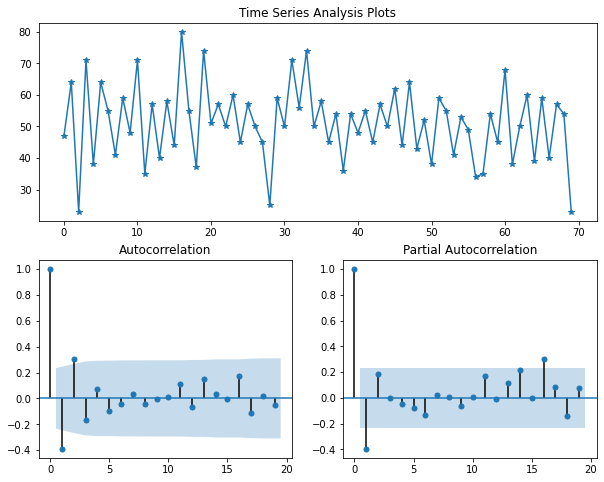

----time series: LB pure randomness test----
           LB    Pvalue  lags
0   11.102981  0.000862     1
1   17.970408  0.000125     2
2   20.032172  0.000167     3
3   20.414083  0.000414     4
4   21.144234  0.000761     5
5   21.318620  0.001608     6
6   21.418720  0.003197     7
7   21.572246  0.005773     8
8   21.574147  0.010331     9
9   21.591549  0.017326    10
10  22.623620  0.019963    11
11  23.034683  0.027433    12
12  24.972360  0.023277    13
13  25.087506  0.033713    14
14  25.091592  0.048727    15
15  27.885103  0.032633    16
16  29.064004  0.033940    17
17  29.102660  0.047139    18
18  29.324222  0.061053    19
19  29.350470  0.081084    20
20  29.401526  0.104690    21
21  30.052039  0.117205    22
22  30.061875  0.147634    23
23  30.647573  0.164206    24
24  30.690176  0.199484    25
25  30.887119  0.232500    26
26  30.944544  0.273422    27
27  31.892658  0.278901    28
28  31.925107  0.323170    29
29  31.927069  0.370927    30
30  31.929785  0.420150  

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:494: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [5]:
##read data
dfname='data1.8'
y=pd.read_csv('%s.csv'%dfname,header=None)
y.iloc[:,0]=y.iloc[:,0].astype('float')
y=y.values[:,0]
drawts(y,dfname)
purerandtest(y)

## 參數估計

In [6]:
import statsmodels.tsa.api as smt
arma10=smt.ARMA(y,(0,2)).fit()
print('\n----fitting summary----')
print(arma10.summary())
print('sigma 2 of residual: %f'%arma10.sigma2)


----fitting summary----
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   70
Model:                     ARMA(0, 2)   Log Likelihood                -265.353
Method:                       css-mle   S.D. of innovations             10.697
Date:                Sun, 10 Oct 2021   AIC                            538.706
Time:                        00:25:20   BIC                            547.700
Sample:                             0   HQIC                           542.278
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.1695      1.252     40.883      0.000      48.716      53.623
ma.L1.y       -0.3194      0.116     -2.754      0.006      -0.547      -0.092
ma.L2.y        0.3019      

## 模型顯著性檢驗

In [7]:
resid=arma10.resid
print('\n----residual pure randomness test')
purerandtest(resid)


----residual pure randomness test
----time series: LB pure randomness test----
           LB    Pvalue  lags
0    0.109496  0.740719     1
1    0.182639  0.912726     2
2    1.397120  0.706210     3
3    1.407588  0.842875     4
4    1.992602  0.850168     5
5    2.321882  0.887845     6
6    2.498349  0.927221     7
7    2.782744  0.947243     8
8    2.951245  0.966197     9
9    3.562736  0.964925    10
10   4.392308  0.957006    11
11   4.480462  0.973126    12
12   5.242404  0.969462    13
13   5.524031  0.977102    14
14   6.243747  0.975356    15
15   9.304154  0.900361    16
16  10.271145  0.891856    17
17  10.767571  0.903958    18
18  10.949160  0.925537    19
19  11.065750  0.944500    20
20  11.283375  0.956980    21
21  11.882489  0.959759    22
22  12.286144  0.965816    23
23  13.641215  0.954343    24
24  13.675957  0.967091    25
25  13.847198  0.974959    26
26  13.901305  0.982200    27
27  15.000644  0.978429    28
28  15.382566  0.981799    29
29  15.383613  0.987

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:494: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


## 模型優化ARMA(1,0)

In [9]:
import statsmodels.tsa.api as smt
arma10=smt.ARMA(y,(1,0)).fit()
print('\n----fitting summary----')
print(arma10.summary())
print('sigma 2 of residual: %f'%arma10.sigma2)

resid=arma10.resid
print('\n----residual pure randomness test')
purerandtest(resid)


----fitting summary----
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   70
Model:                     ARMA(1, 0)   Log Likelihood                -265.979
Method:                       css-mle   S.D. of innovations             10.798
Date:                Sun, 10 Oct 2021   AIC                            537.958
Time:                        00:33:21   BIC                            544.703
Sample:                             0   HQIC                           540.637
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.2658      0.914     56.106      0.000      49.475      53.057
ar.L1.y       -0.4191      0.113     -3.715      0.000      -0.640      -0.198
                           

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:494: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)
